## DATASET 1 - Straight Line Curve Fitting

The estimated equation by least squares method is 2.791124245414918 x + 3.848800101430742
Estimated function by curve fit method is: 2.7911242448201588x + 3.848800111263445
Approximate slope is 2.7911242451175386 and approximate intercept value is 3.8488001063470936
Least squares method is more accurate than curve fitting method
237 µs ± 6.75 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
31.9 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


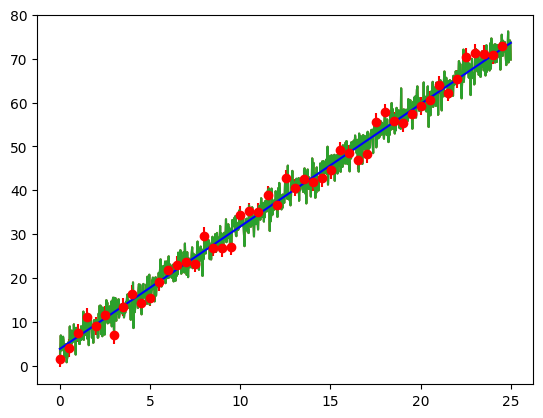

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def stline(x, m, c):
    return m * x + c      #function for straight line equation
def plot(filename):
    file = open(filename, "r")
    file_data = file.readlines() #reading the data line by line
    file.close()
    data_length = len(file_data)
   
    x = np.array([], dtype = float)  #creating array
    y = np.array([], dtype = float)
    for i in range(data_length):
        line = file_data[i].split()
        
        x = np.append(x, float(line[0]))#adding x values to x array
        y = np.append(y, float(line[1]))#adding y values to y array
        
        
    #least squares method    
    M = np.column_stack([x, np.ones(len(x))]) 
    (p1, p2), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
    print(f"The estimated equation by least squares method is {p1} x + {p2}")
    yest = stline(x, p1, p2)
    plt.plot(x, y, x, y, x, yest, "y") #lstsq plot 
    plt.errorbar(x[::20], y[::20], np.std(yest-y), fmt='ro')#errorbars for lstsq method
    
    #curve fit method
    from scipy.optimize import curve_fit
    (zp1, zp2), pcov = curve_fit(stline, x, y)
    print(f"Estimated function by curve fit method is: {zp1}x + {zp2}")
    soln = stline(x, zp1, zp2)
    plt.plot(x, y, x, soln, 'b')#curve_fit plot
    
    #Analysis of both methods
    
    print(f"Approximate slope is {(p1+zp1)/2.0} and approximate intercept value is {(p2+zp2)/2.0}")
    #accuracy check
    stdev1 = np.std(yest-y)
    stdev2 = np.std(soln-y)
    if stdev1 < stdev2:
        print("Least squares method is more accurate than curve fitting method")
    else:
        print("Curve fitting method is more accurate than least squares method")
    #comparing time taken by each function
    def lstsq(M, y):
        return np.linalg.lstsq(M,y, rcond = None )
    def curve_fit(stline, x, y):
        from scipy.optimize import curve_fit
        return curve_fit(stline, x, y)
    %timeit curve_fit(stline, x, y) #time taken by curve fit 
    %timeit lstsq(M,y)              #time taken by lstsq method
     
plot("dataset1 week 3.txt") 



- In the above graph the errorbars have been plotted in red. The frequency of the when an errorbar is labelled is controlled by the parameter [::n] where n is the sampling rate. The size of error bar depends on the "std" parameter. It is the standard deviation of the difference of the output we got from curve fitting operation and the output we got from the text data. Bigger the standard deviation, bigger the size of the errorbars.

- In the above code I have performed two curve fitting operations, Least square method and curve_fit method.As we can see above, the least square and curve fit method yield almost exactly similar results. I would use least squares method for a linear case such as above, where we need to find only 2 variables because it is faster than the curve_fit method as seen from the timeit outputs. Both method give us good accuracy as their stdev is made to be minimum.
- Using the np.std function we can find the accuracy of each curve by measuring the standard deviation of the set of difference in the actual value and the value generated by each curve. The above tells us that least squares method is more accurate as it has a lesser standard deviation than the curve fitting method.

- Note that both the lines completely coincide since they give almost the same output. The line is in color blue. 


## Dataset 2 - Fourier Series 

Estimated: 5.978650192290016 * sin(pi*0.7995828947377468*x) + 5.978650192290016/3 * np.sin(np.pi *3* 0.7995828947377468 * x) + 5.978650192290016/5 * np.sin(np.pi * 5 * 0.7995828947377468 * x) 
By identifying the troughs and crests of the different harmonics of the wave we can conclude that the number of terms are 3 (neglecting the even multiple terms)
Fundamental freq is: 0.3997914473688734
Amplitude of the sine waves are : 5.978650192290016 , 1.9928833974300053 , 1.1957300384580032


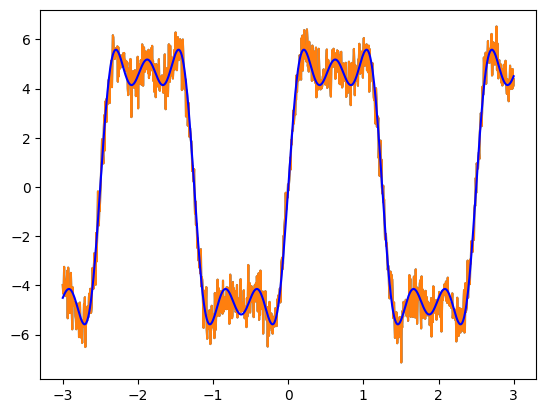

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot(filename):
    file = open(filename, "r")
    file_data = file.readlines() #reading the data line by line
    file.close()
    data_length = len(file_data)
   
    x = np.array([], dtype = float)  #creating array
    y = np.array([], dtype = float)
    for i in range(data_length):
        line = file_data[i].split()
    
        x = np.append(x, float(line[0]))#adding x values to x array
        y = np.append(y, float(line[1]))#adding y values to y array
        
    plt.plot(x, y)
    
    def sinfunc(x, p1, p2):
        return p1 * np.sin(np.pi *1* p2 * x)+ p1/3 * np.sin(np.pi *3* p2 * x) + p1/5 * np.sin(np.pi * 5 * p2 * x) 
    
    (sp1, sp2), _ = curve_fit(sinfunc, x, y) #curve fitting
    print(f"Estimated: {sp1} * sin(pi*{sp2}*x) + {sp1}/3 * np.sin(np.pi *3* {sp2} * x) + {sp1}/5 * np.sin(np.pi * 5 * {sp2} * x) ")
    # Regenerate data
    sest = sinfunc(x, sp1, sp2) #generating optimal parameters
    plt.plot(x, y, x, sest, "b") #plotting curve fit graph
    print("By identifying the troughs and crests of the different harmonics of the wave we can conclude that the number of terms are 3 (neglecting the even multiple terms)")
    print(f"Fundamental freq is: {sp2/2}")
    print(f"Amplitude of the sine waves are : {sp1} , {sp1/3} , {sp1/5}") 
plot("dataset2 week 3.txt") 

## Explanation

- On observing the graph of the dataset it is quite clear that the waves is approximately a square wave. 
- We know that the fourier series of a square wave is the sum of sine waves and we can find the appropriate expression. 
- Reference :     https://mathworld.wolfram.com/FourierSeriesSquareWave.html
- Now we need to find the number of sine terms that fit the dataset.
- Note that the dataset graph is odd, thus no even terms will be present.
- On observing the fringes and experimenting with values of n, we find that when n=3, it matches the 3 fringes at the apex of the curve.
- We can also tell that n=3 by seeing that the fourier transform of the above dataset gives spikes at 3 frequencies.
- After we know n=3 , we construct the appropriate equation of the fourier series and use the curvefit function to optimize the values of frequency and amplitude of each sine term.
- The appropriate values are printed above.
- Clearly non-linear fitting is preferred here as the curve is highly non linear.
- Assumption: Complete accuracy of the curve wasn't possible as the curve is given in a limited range of values and inherently discrete in nature. If the y values were discretized less and made more continious, we can find a more accurate curve. 

## Errorbars Plot

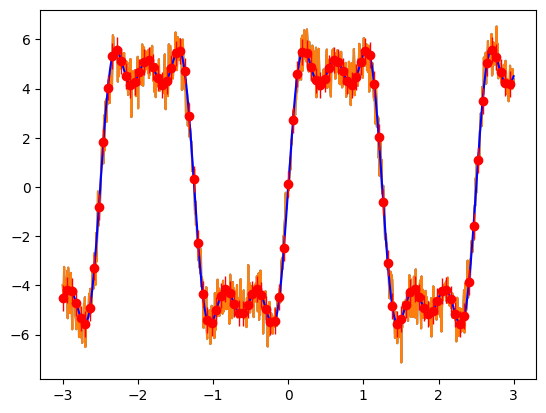

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot(filename):
    file = open(filename, "r")
    file_data = file.readlines() #reading the data line by line
    file.close()
    data_length = len(file_data)
    x = np.array([], dtype = float)  #creating array
    y = np.array([], dtype = float)
    for i in range(data_length):
        line = file_data[i].split()
        x = np.append(x, float(line[0]))#adding x values to x array
        y = np.append(y, float(line[1]))#adding y values to y array
    plt.plot(x, y) 
    def sinfunc(x, p1, p2):
        return p1 * np.sin(np.pi *1* p2 * x)+ p1/3 * np.sin(np.pi *3* p2 * x) + p1/5 * np.sin(np.pi * 5 * p2 * x) 
    (sp1, sp2), _ = curve_fit(sinfunc, x, y) #curve fitting
    sest = sinfunc(x, sp1, sp2)
    plt.plot(x, y, x, sest, "b")
    plt.errorbar(x[::10], sest[::10], np.std(y-sest), fmt='ro', elinewidth=1) #plotting errorbars

plot("dataset2 week 3.txt") 

## Dataset-3 : Planck's Constant 

The estimated value of Planck's constant is: 6.643229763554703e-34 and the estimated temperature is: 6011.361524823717


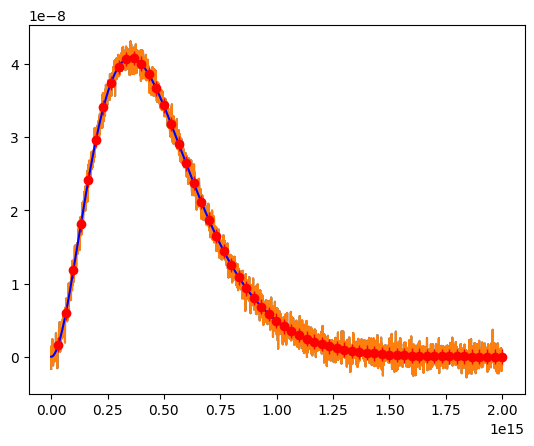

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
def plot(filename):
    file = open(filename, "r")
    file_data = file.readlines() #reading the data line by line
    file.close()
    data_length = len(file_data)
   
    x = np.array([], dtype = float)  #creating array
    y = np.array([], dtype = float)
    for i in range(data_length):
        line = file_data[i].split()
        
        x = np.append(x, float(line[0]))#adding x values to x array
        y = np.append(y, float(line[1]))#adding y values to y array

    plt.plot(x,y)
    

    def planck(v, h, T):
        kb = 1.38e-23
        c= 3.0e8
        a = (2* h * pow(v,3))/(pow(c,2))
        b = np.exp((h/kb)*(v/T))-1
        return a/b

    (h,T), pcov = curve_fit(planck, x, y,p0=(6.6e-34, 300)) #curve fitting
    sest = planck(x, h, T)
    plt.plot(x, y, x, sest, "b")#plot in blue
    plt.errorbar(x[::50], sest[::50], np.std(y-sest), fmt='ro', elinewidth=1) #plotting errorbars in red
    print(f"The estimated value of Planck's constant is: {h} and the estimated temperature is: {T}")
plot("dataset3 week 3.txt") 

## Explanation
- We first plot the dataset values.
- We then define planck's law: $$B(\nu, T)= \frac {2h\nu^3}{c^2} \frac {1}{\frac {hv}{e k_B T}-1}$$
- We then use the curve fitting operation to find optimal values of temperature and planck's constant.
- We use the p0 argument and provide approximate value of h and room temperature value additionally to reduce number of runs the      program takes to find the optimal value.
- We then plot the graph with the optimal values and errorbars accordingly.
- Clearly non linear optimization has to be used here as the dataset is extremely non linear.

## Dataset 4 : Arbitary Function

We plot the dataset first

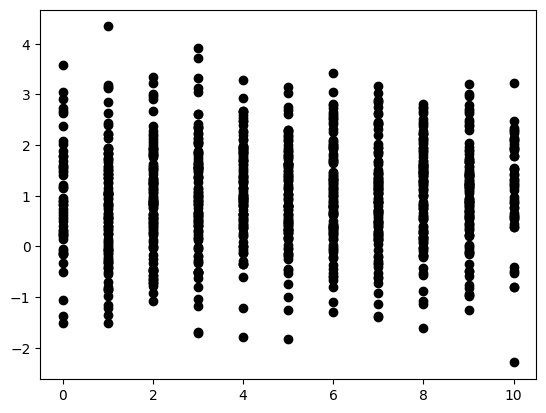

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def stline(x, m, c):
    return m * x + c      #function for straight line equation
def plot(filename):
    file = open(filename, "r")
    file_data = file.readlines() #reading the data line by line
    file.close()
    data_length = len(file_data)
   
    x = np.array([], dtype = float)  #creating array
    y = np.array([], dtype = float)
    for i in range(data_length):
        line = file_data[i].split()
        
        x = np.append(x, float(line[0]))#adding x values to x array
        y = np.append(y, float(line[1]))#adding y values to y array
    return x,y
x,y = plot("dataset4 week 3.txt")
plt.scatter(x,y, color = "black") #plot of dataset(scatterplot)

Note that the above graph is discrete and not continuous.

We now find the intervals of x to figure out how many y values are there for each x.

In [6]:
interval = [0]
for i in range(len(x)-1):
    if x[i] +1 == x[i+1]:
        interval.append(i+1)
interval.append(len(x))
print(interval)

[0, 50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1000]


We can now plot histograms of the y values and their frequency for each value of x.
Below is for **x=0**  
The bins argument divides the y values into 13 equal width ranges. When one of the y values for x = i falls in that range, the histogram value(yaxis) is incremented by one.

(array([2., 1., 1., 6., 8., 6., 7., 6., 4., 3., 3., 2., 1.]),
 array([-1.51436367, -1.12269457, -0.73102547, -0.33935637,  0.05231273,
         0.44398183,  0.83565094,  1.22732004,  1.61898914,  2.01065824,
         2.40232734,  2.79399644,  3.18566554,  3.57733464]),
 <BarContainer object of 13 artists>)

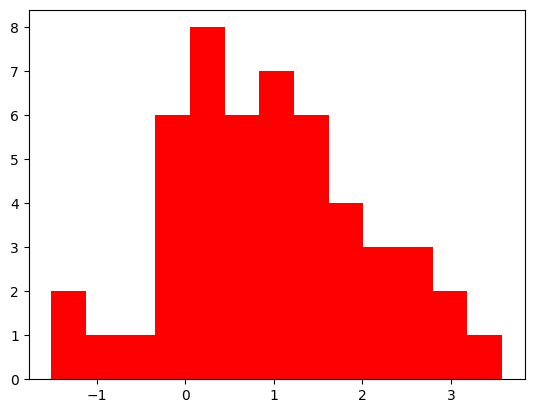

In [7]:
plt.hist(y[0:50], color = "r", bins=13 )  #x=0

(array([ 4.,  6., 11., 15., 15., 15., 13., 10.,  5.,  2.,  3.,  0.,  1.]),
 array([-1.50648208, -1.05664433, -0.60680658, -0.15696883,  0.29286892,
         0.74270667,  1.19254442,  1.64238217,  2.09221992,  2.54205768,
         2.99189543,  3.44173318,  3.89157093,  4.34140868]),
 <BarContainer object of 13 artists>)

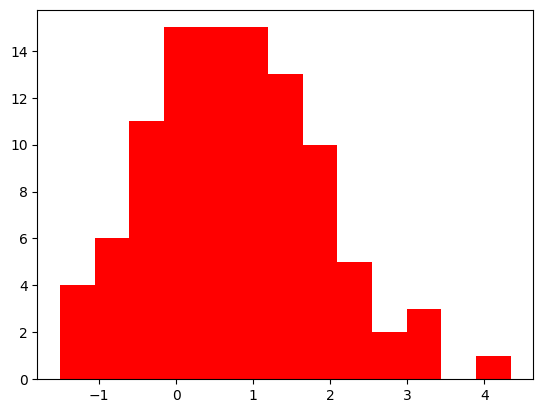

In [8]:
plt.hist(y[50:150], color = "r", bins=13 )  #x=1

(array([ 3., 12.,  3.,  8., 13., 15., 13., 10., 10.,  6.,  1.,  3.,  3.]),
 array([-1.07320189, -0.73264131, -0.39208073, -0.05152015,  0.28904043,
         0.629601  ,  0.97016158,  1.31072216,  1.65128274,  1.99184332,
         2.3324039 ,  2.67296448,  3.01352506,  3.35408564]),
 <BarContainer object of 13 artists>)

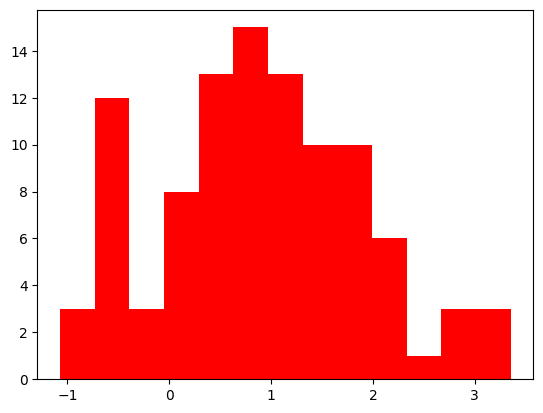

In [9]:
plt.hist(y[150:250], color = "r", bins=13 )  #x=2

(array([ 2.,  2.,  7.,  8., 10., 16., 13., 18., 11.,  8.,  1.,  2.,  2.]),
 array([-1.69731419, -1.26481785, -0.8323215 , -0.39982515,  0.03267119,
         0.46516754,  0.89766389,  1.33016023,  1.76265658,  2.19515292,
         2.62764927,  3.06014562,  3.49264196,  3.92513831]),
 <BarContainer object of 13 artists>)

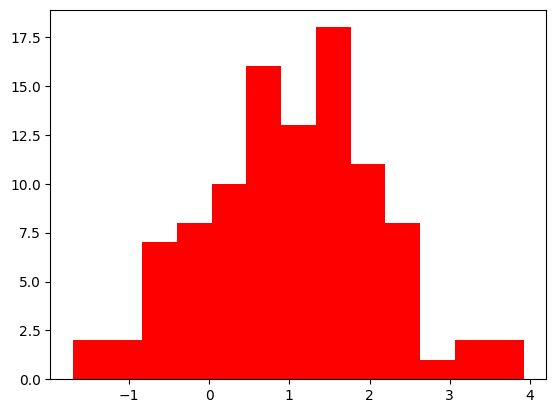

In [10]:
plt.hist(y[250:350], color = "r", bins=13 )  #x=3

(array([ 1.,  1.,  0.,  5.,  7., 12., 17., 16., 12., 15.,  7.,  5.,  2.]),
 array([-1.79054622, -1.39971615, -1.00888609, -0.61805603, -0.22722597,
         0.1636041 ,  0.55443416,  0.94526422,  1.33609428,  1.72692435,
         2.11775441,  2.50858447,  2.89941453,  3.2902446 ]),
 <BarContainer object of 13 artists>)

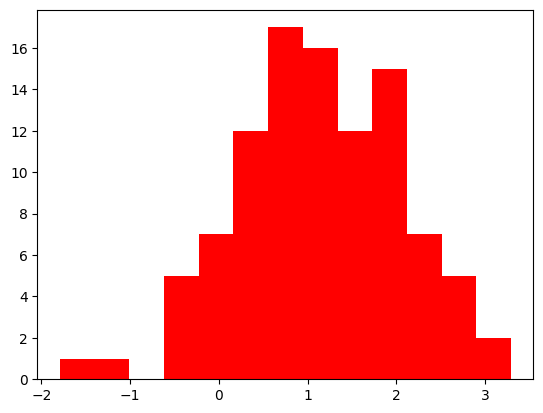

In [11]:
plt.hist(y[350:450], color = "r", bins=13 )  #x=4

(array([ 1.,  1.,  2.,  3.,  8., 17., 16., 10., 13., 14., 10.,  3.,  2.]),
 array([-1.82221931, -1.44056489, -1.05891046, -0.67725604, -0.29560162,
         0.08605281,  0.46770723,  0.84936166,  1.23101608,  1.61267051,
         1.99432493,  2.37597936,  2.75763378,  3.1392882 ]),
 <BarContainer object of 13 artists>)

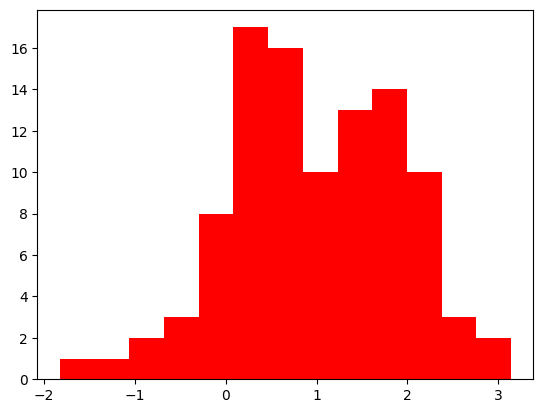

In [12]:
plt.hist(y[450:550], color = "r", bins=13 )  #x=5

(array([ 2.,  4.,  5.,  7., 15., 13., 13., 11., 11.,  7.,  7.,  4.,  1.]),
 array([-1.28833362, -0.92643459, -0.56453556, -0.20263653,  0.1592625 ,
         0.52116153,  0.88306056,  1.24495959,  1.60685862,  1.96875765,
         2.33065668,  2.69255571,  3.05445474,  3.41635377]),
 <BarContainer object of 13 artists>)

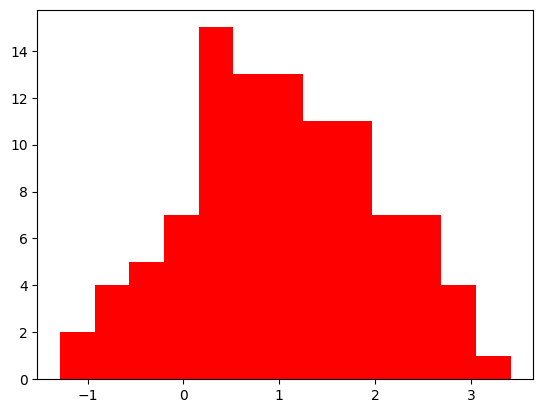

In [13]:
plt.hist(y[550:650], color = "r", bins=13 )  #x=6

- Above I have plotted the graphs for x =0 to x = 6.
- A common pattern that can be observed is that the histogram resembles a normal distribution curve(gaussian).
- Thus the values of y are normally distributed for each x. 
- We can consider this to be an experiment where we measure a particular quantity say **Q**. 
- The true value of Q will be the mean of the distrbution, as expected value  = mean in a normal distribution. 
- The normal distribution can even represent the noise that occurs while measuring Q which is common in real experiments. 
- Below is the image of normal distribution for reference.



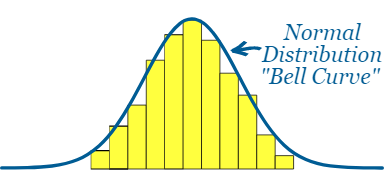!

Thus for each x, the best value of y that represents the expected value of the quantity Q which we are finding, will be the mean of the set of y values.

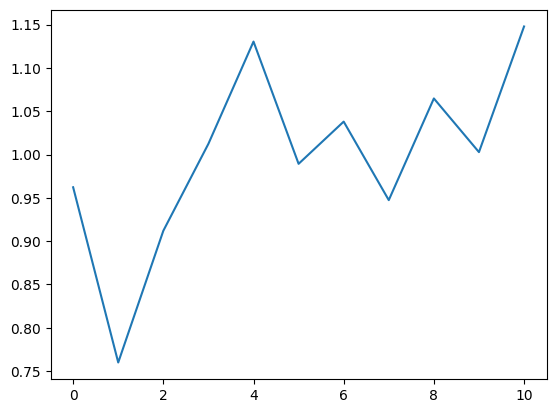

In [14]:
import numpy as np
from scipy.optimize import curve_fit
xn = [] #array of discrete x values
for i in range(11):
    xn.append(i)

ym = [] # array of the mean y values
for i in range(len(interval) - 1):
    ym.append(np.mean(y[interval[i]:interval[i+1]]))
plt.plot(xn,ym)

Here x and y have no relationship we can deduce. Thus I have assumed that y has no dependence on x.
For eg: Y could be Temperature of an object measured at many points and repeated 11 times. Here x will be the ith time the experiment was conducted which has no impact on the temp of the object.
Thus the Y value we can deduce from the dataset will be the mean of the mean of the readings we get each time.

In [15]:
mean = np.mean(ym)
print(f"The value of Y deduced from the dataset is {mean}")

The value of Y deduced from the dataset is 0.9970235654651063
